In [1]:
import time
import sys
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
import multiprocessing
import os
from tqdm import tqdm
from scipy import sparse

/Users/woongkook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import ensemble

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp

/Users/woongkook/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
weather_file = pd.read_csv("Data/weather_processed.csv", sep = ',')
#date와 station_nbr정보를 가져옴
multi_index = [weather_file.values[:,1], weather_file.values[:,0]]
#index를 date와 station_nbr기준으로 하여 데이터를 가져옴
df = pd.DataFrame(weather_file.values[:,2:], index=multi_index, columns=weather_file.columns.values[2:])
df

tmax tmin tavg depart dewpoint wetbulb heat cool sunrise sunset  \
2012-01-01 1    52   31   42     16       36      40   23    0     716   1626   
           2    48   33   41     16       37      39   24    0     716   1626   
           3    55   34   45      9       24      36   20    0     735   1720   
           4    63   47   55      4       28      43   10    0     728   1742   
           6    63   34   49      0       31      43   16    0     727   1742   
           7    50   33   42      0       26      35   23    0     727   1742   
           8    66   45   42      0       34      46   23    0     727   1742   
           9    34   19   27      0       17      23   38    0     727   1742   
           10   73   53   63      0       55      58    2    0     723   1738   
           11   72   48   60      7       54      56    5    0     724   1737   
           12   72   48   60      7       54      57    5    0     724   1737   
           13   38   18   28      7       12      21   37    0     724   1737   
           14   50   34   42      5       25      35   23    0     739   1729   
           15   48   26   37     16       35      38   28    0     718   1621   
           16   50   30   40     16       37      40   25    0     718   1621   
           17   56   38   47     16       23      37   18    0     718   1621   
           18   59   40   50      4       28      40   15    0     730   1732   
           19   38   25   32     10       26      30   33    0     723   1628   
           20   59   41   50     10       28      40   15    0     723   1628   
2012-01-02 1    50   31   41     10       26      35   24    0     723   1628   
           2    46   28   37     12       24      32   28    0     716   1627   
           3    45   24   35     -1       11      28   30    0     735   1721   
           4    60   37   49     -2       26      39   16    0     728   1742   
           6    60   30   45     -4       27      38   20    0     727   1742   
           7    44   26   35     -4       17      29   30    0     727   1742   
           8    59   36   35     -4       29      40   30    0     727   1742   
           9    21   11   16     -4        8      15   49    0     727   1742   
           10   65   45   55     -4       33      46   10    0     723   1738   
           11   63   40   52     -1       31      44   13    0     724   1738   
           12   65   47   56     -1       33      46    9    0     724   1738   
...            ...  ...  ...    ...      ...     ...  ...  ...     ...    ...   
2014-10-30 11   81   59   70      4       63      65    0    5     640   1741   
           12   81   61   71      4       63      66    0    6     640   1741   
           13   61   32   47      4       26      38   18    0     640   1741   
           14   77   45   61      5       39      50    4    0     650   1738   
           15   56   30   43      0       36      39   22    0     618   1641   
           16   57   34   46      0       39      43   19    0     618   1641   
           17   77   43   60      0       41      50    5    0     618   1641   
           18   79   56   68      5       51      58    0    3     643   1739   
           19   51   32   42     -4       33      40   23    0     623   1647   
           20   80   52   66     -4       50      57    0    1     623   1647   
2014-10-31 1    53   40   47     -4       36      41   18    0     623   1647   
           2    49   40   45      0       35      40   20    0     619   1643   
           3    55   33   44    -12       32      41   21    0     645   1729   
           4    76   56   66     -1       47      56    0    1     644   1745   
           5    76   56   66     -1       37      56    0    1     616   1640   
           6    76   51   64      0       47      55    1    0     644   1745   
           7    58   38   48      0       32      41   17    0     644   1745   
           8    78   55   67      0       32 

In [14]:
key_file = pd.read_csv("Data/key.csv", sep=',')
key_file

,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12
5,6,14
6,7,6
7,8,4
8,9,17
9,10,12


In [15]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

In [16]:
token = ('+FCFCTSGRRADZSNSGGSPLICFG+FGBRUPHZFUVADUDSPOSOSASSPYSQDRSHFZMIPRBCBLVC')

In [17]:
# codesum 분류를 위한 기준 설정 및 추출 함수
ls = np.array(['+FC', 'FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC', 'FG+', 
               'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SO', 'SA', 'SS',
                'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC'])



def validation(token):
    result3 = []
    for each in ls:
        if each in token:
            token = token.replace(each,'')
            result3.append(each)
    return result3


def extract_cs():
    test = list(weather.codesum.unique())
    result = []
    for each in test:
        result.append(validation(each))
    return result

In [18]:
weather = pd.read_csv("Data/weather.csv", sep=',')
# 위 codesum 추출 함수를 기반으로 codesum value에 해당하는 컬럼 및 값 부여
cs_iter = (set(validation(token)) for x in weather.codesum)
cs = sorted(set.union(*cs_iter))

dummies = pd.DataFrame(np.zeros((len(weather), len(cs))), columns = cs)


for i, gen in enumerate(weather.codesum):
    dummies.ix[i, validation(gen)] = '1'
    
weather_cs = weather.join(dummies)
weather_cs

/Users/woongkook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,SG,SH,SN,SO,SQ,SS,TS,UP,VA,VC
0,1,2012-01-01,52,31,42,M,36,40,23,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
1,2,2012-01-01,48,33,41,16,37,39,24,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
2,3,2012-01-01,55,34,45,9,24,36,20,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
3,4,2012-01-01,63,47,55,4,28,43,10,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
4,6,2012-01-01,63,34,49,0,31,43,16,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
5,7,2012-01-01,50,33,42,M,26,35,23,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
6,8,2012-01-01,66,45,M,M,34,46,M,M,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
7,9,2012-01-01,34,19,27,M,17,23,38,0,...,0,0.0,0,0.0,0,0.0,0,1,0.0,0
8,10,2012-01-01,73,53,63,M,55,58,2,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
9,11,2012-01-01,72,48,60,7,54,56,5,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0


In [19]:
weather_file = pd.read_csv("Data/weather.csv", sep=',')
weather_data = weather_file.drop('codesum', axis = 1) # codesum 컬럼 삭제
    
data = weather_data.values[:,2:] # index, station_nbr, date를 제외한 나머지 데이터 array로 변경
# 데이터가 있을 경우 float형으로 변경, 데이터가 없을 경우 unicodedata로 변경
for col in range(data.shape[1]):
    for row in range(data.shape[0]):
        if not is_number(data[row, col]):
            if row == 0:
                i = 1
                while not is_number(data[row+i, col]):
                    i += 1
                data[row, col] = data[row+i, col]
            else:
                data[row, col] = data[row-1, col]
        data[row, col] = float(data[row, col]) # Convert string to float value

weather_processed = np.append(weather_file.values[:,0:2], data, axis = 1)
weather_df = pd.DataFrame(weather_processed, index=None, columns=weather_data.columns.values)
    
weather_df

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,16,36,40,23,0,716,1626,0,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,716,1626,0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,735,1720,0,0,29.77,30.47,9.9,31,10
3,4,2012-01-01,63,47,55,4,28,43,10,0,728,1742,0,0,29.79,30.48,8,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,727,1742,0,0,29.95,30.47,14,36,13.8
5,7,2012-01-01,50,33,42,0,26,35,23,0,727,1742,0,0,29.15,30.54,10.3,32,10.2
6,8,2012-01-01,66,45,42,0,34,46,23,0,727,1742,0,0,30.05,30.54,11,36,10.9
7,9,2012-01-01,34,19,27,0,17,23,38,0,727,1742,0,0,29.34,30.09,22.8,30,22.5
8,10,2012-01-01,73,53,63,0,55,58,2,0,723,1738,0,0,30.16,30.19,5.1,24,5.5
9,11,2012-01-01,72,48,60,7,54,56,5,0,724,1737,0,0,30.15,30.18,4.6,23,4.8


In [20]:
def process_weather():
    weather_file = pd.read_csv("Data/weather.csv", sep=',')
    weather_data = weather_file.drop('codesum', axis = 1) # codesum 컬럼 삭제
    
    data = weather_data.values[:,2:] # index, station_nbr, date를 제외한 나머지 데이터 array로 변경
    # 데이터가 있을 경우 float형으로 변경, 데이터가 없을 경우 unicodedata로 변경
    for col in range(data.shape[1]):
        for row in range(data.shape[0]):
            if not is_number(data[row, col]):
                if row == 0:
                    i = 1
                    while not is_number(data[row+i, col]):
                        i += 1
                    data[row, col] = data[row+i, col]
                else:
                    data[row, col] = data[row-1, col]
            data[row, col] = float(data[row, col]) # Convert string to float value

    weather_processed = np.append(weather_file.values[:,0:2], data, axis = 1)
    df = pd.DataFrame(weather_processed, index=None, columns=weather_data.columns.values)
    df.to_csv("Data/weather_processed.csv", sep=',', index=None)

In [21]:
key_file = pd.read_csv("Data/key.csv", sep=',')
df = pd.DataFrame(key_file.values[:,1], index = key_file.values[:,0])
df
get_station_data()

NameError: name 'get_station_data' is not defined

In [22]:
#index를 제외한 key데이터를 dataframe로 가져옴
def match_store_station():
    key_file = pd.read_csv("Data/key.csv", sep=',')
    df = pd.DataFrame(key_file.values[:,1], index = key_file.values[:,0])
    return df

In [23]:
def read_processed_weather():
    weather_file = pd.read_csv("Data/weather_processed.csv", sep = ',')
    #date와 station_nbr정보를 가져옴
    multi_index = [weather_file.values[:,1], weather_file.values[:,0]]
    #index를 date와 station_nbr기준으로 하여 데이터를 가져옴
    df = pd.DataFrame(weather_file.values[:,2:], index=multi_index, columns=weather_file.columns.values[2:])
    return df

In [24]:
a = read_processed_weather()
a

tmax tmin tavg depart dewpoint wetbulb heat cool sunrise sunset  \
2012-01-01 1    52   31   42     16       36      40   23    0     716   1626   
           2    48   33   41     16       37      39   24    0     716   1626   
           3    55   34   45      9       24      36   20    0     735   1720   
           4    63   47   55      4       28      43   10    0     728   1742   
           6    63   34   49      0       31      43   16    0     727   1742   
           7    50   33   42      0       26      35   23    0     727   1742   
           8    66   45   42      0       34      46   23    0     727   1742   
           9    34   19   27      0       17      23   38    0     727   1742   
           10   73   53   63      0       55      58    2    0     723   1738   
           11   72   48   60      7       54      56    5    0     724   1737   
           12   72   48   60      7       54      57    5    0     724   1737   
           13   38   18   28      7       12      21   37    0     724   1737   
           14   50   34   42      5       25      35   23    0     739   1729   
           15   48   26   37     16       35      38   28    0     718   1621   
           16   50   30   40     16       37      40   25    0     718   1621   
           17   56   38   47     16       23      37   18    0     718   1621   
           18   59   40   50      4       28      40   15    0     730   1732   
           19   38   25   32     10       26      30   33    0     723   1628   
           20   59   41   50     10       28      40   15    0     723   1628   
2012-01-02 1    50   31   41     10       26      35   24    0     723   1628   
           2    46   28   37     12       24      32   28    0     716   1627   
           3    45   24   35     -1       11      28   30    0     735   1721   
           4    60   37   49     -2       26      39   16    0     728   1742   
           6    60   30   45     -4       27      38   20    0     727   1742   
           7    44   26   35     -4       17      29   30    0     727   1742   
           8    59   36   35     -4       29      40   30    0     727   1742   
           9    21   11   16     -4        8      15   49    0     727   1742   
           10   65   45   55     -4       33      46   10    0     723   1738   
           11   63   40   52     -1       31      44   13    0     724   1738   
           12   65   47   56     -1       33      46    9    0     724   1738   
...            ...  ...  ...    ...      ...     ...  ...  ...     ...    ...   
2014-10-30 11   81   59   70      4       63      65    0    5     640   1741   
           12   81   61   71      4       63      66    0    6     640   1741   
           13   61   32   47      4       26      38   18    0     640   1741   
           14   77   45   61      5       39      50    4    0     650   1738   
           15   56   30   43      0       36      39   22    0     618   1641   
           16   57   34   46      0       39      43   19    0     618   1641   
           17   77   43   60      0       41      50    5    0     618   1641   
           18   79   56   68      5       51      58    0    3     643   1739   
           19   51   32   42     -4       33      40   23    0     623   1647   
           20   80   52   66     -4       50      57    0    1     623   1647   
2014-10-31 1    53   40   47     -4       36      41   18    0     623   1647   
           2    49   40   45      0       35      40   20    0     619   1643   
           3    55   33   44    -12       32      41   21    0     645   1729   
           4    76   56   66     -1       47      56    0    1     644   1745   
           5    76   56   66     -1       37      56    0    1     616   1640   
           6    76   51   64      0       47      55    1    0     644   1745   
           7    58   38   48      0       32      41   17    0     644   1745   
           8    78   55   67      0       32 

In [25]:
def get_station_data(store_nbr, store_station_pairs):
    station_nbr = store_station_pairs.loc[store_nbr].values[0]
    return station_nbr

In [26]:
def get_weather_data(date, store_nbr, store_station_pairs, weather_file):
    station_nbr = store_station_pairs.loc[store_nbr].values[0]
    weather_data = weather_file.loc[date, station_nbr].values
    return weather_data

In [27]:
def get_item_list():
    #train data에서 item_nbr data중복 제거 후 list로 변환
    train_file = pd.read_csv("Data/train.csv", sep=',')
    item_list = list(set(list(train_file.values[:,2])))
    return item_list

In [28]:
def get_item_data(item_nbr, percent, store_station_pairs, weather_file, train_file):
    start = time.time()
    train_num = train_file.values[:,1].shape[0]

    item_index = np.where(train_file.values[:,2] == item_nbr)
    item_index = item_index[0]
    num = int(item_index.shape[0]*(1-percent)) # Select according to the given percentage, need to be improved
    iter_list = range(num, item_index.shape[0])
    item_dataset = np.zeros((len(iter_list), weather_file.values.shape[1]+1))
    count = 0
    #print len(iter_list)
    for i in iter_list:
        index = item_index[i]
        #print count
        date = train_file.values[:,0][index]
        store_nbr = train_file.values[:,1][index]
        units = train_file.values[:,3][index]

        weather_data = get_weather_data(date, store_nbr, store_station_pairs, weather_file)

        item_dataset[count,:] =  np.append(weather_data, [units], axis=0)
        count += 1
    end = time.time()
    #print "Running time for item %d: %f" %(int(item_nbr), (end-start))
    return item_dataset

In [29]:
def write_item_data(tasks):
    item_list = tasks.get()
    #print item_list
    store_station_pairs = match_store_station()
    weather_file = read_processed_weather() # index has 2 columns and values has 17 columns
    train_file = pd.read_csv("Data/train.csv", sep=',')

    #item_list = get_item_list()
    #item_nbr = item_list[0]
    for item_nbr in item_list:
        item_dataset = get_item_data(item_nbr, 0.1, store_station_pairs, weather_file, train_file) # Give percentage
        df = pd.DataFrame(item_dataset, index=None, columns=None)
        filename = "Item_data/item_%d.csv" %(int(item_nbr))
        df.to_csv(filename, sep=',', index=None, columns=None)

In [30]:
def multi_process(traget_func):
    processors = multiprocessing.cpu_count()

    myTasks = multiprocessing.Queue()
    item_list = get_item_list()
    temp_part = []
    div = len(item_list)/(processors-1)
    rem = len(item_list)%(processors-1)
    ind = 0
    while ind < div*(processors-1): 
        temp_part.append(item_list[ind:ind+div])
        ind = ind+div
    temp_part.append(item_list[(len(item_list)-rem):])

    for each in temp_part:
        myTasks.put(each)

    Workers = [multiprocessing.Process(target = traget_func, args =(myTasks,)) for i in range(processors)]

    #Workers[0].start()

    for each in Workers:
        each.start()

In [31]:
def read_item_data(item_nbr):
    filename = "Item_data/item_%d.csv" %(int(item_nbr))
    item_dataset = pd.read_csv(filename, sep=',')

    item_data = item_dataset.values[:,0:-1]
    item_label = item_dataset.values[:,-1]
    return item_data, item_label

In [32]:
def split_item_data(item_nbr, type):
    item_data, item_label = read_item_data(item_nbr)
    X_train, X_test, y_train, y_test = train_test_split(item_data, item_label, test_size=0.25, random_state=42)
    if type == 'train':
        return X_train, y_train
    elif type == 'test':
        return X_test, y_test

In [33]:
train_file = pd.read_csv("Data/train.csv", sep=',')
train_file = train_file[train_file['units'] > 0]
train_file    

,date,store_nbr,item_nbr,units
8,2012-01-01,1,9,29
27,2012-01-01,1,28,2
50,2012-01-01,1,51,1
115,2012-01-01,2,5,191
154,2012-01-01,2,44,215
226,2012-01-01,3,5,214
266,2012-01-01,3,45,112
341,2012-01-01,4,9,61
359,2012-01-01,4,27,21
459,2012-01-01,5,16,24


In [34]:
def get_full_data():
    train_file = pd.read_csv("Data/train.csv", sep=',')
    train_file = train_file[train_file['units'] == 0]

    store_station_pairs = match_store_station()
    #weather_file = read_weather() # index has 2 columns and values has 18 columns
    weather_file = read_processed_weather()
    train_num = train_file.values[:,1].shape[0]
    item_dataset = [] # Should be 20 columns
    for ind in tqdm(range(train_num)):
        store_nbr = train_file.values[:,1][ind]
        date = train_file.values[:,0][ind]  
        weather_data = get_weather_data(date, store_nbr, store_station_pairs, weather_file)
        station_nbr = get_station_data(store_nbr, store_station_pairs)
        #weather_data = np.append(train_file.values[:,2:][ind], weather_data, axis = 1) #[item_nbr, units, weather_features]
        #weather_data = np.concatenate((train_file.values[:,2:][ind], weather_data), axis = 0)
        date = np.array([date, store_nbr, station_nbr])
        result = np.concatenate((date, train_file.values[:,2:][ind], weather_data), axis = 0)
        
        item_dataset.append(result)

    item_dataset = np.array(item_dataset)
    #train_columns = np.append(np.array(['item_nbr','units']), weather_file.columns.values, axis=1)
    train_columns = np.concatenate((np.array(['date', 'store_nbr', 'station_nbr', 'item_nbr','units']), weather_file.columns.values), axis=0)
    train_df = pd.DataFrame(item_dataset, index=None, columns=train_columns) # Build item_nbr index on units and weather features
    train_df.to_csv("train_feature_matrix_1.csv", sep=',', index=None)
    return train_df

In [35]:
get_full_data()

  0%|          | 32/4498904 [00:29<1164:57:22,  1.07it/s]

KeyboardInterrupt: 

In [65]:
train_features = pd.read_csv("train_feature_matrix.csv", sep=',')
holidays = pd.read_csv('holidays.csv', sep=',')

In [66]:
train_features.tail()

,date,store_nbr,station_nbr,item_nbr,units,tmax,tmin,tavg,depart,dewpoint,...,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
118691,2014-10-31,44,12,5,47,75.0,60.0,68.0,-2.0,53.0,...,3.0,640.0,1740.0,0.0,0.0,29.8,29.85,7.0,32.0,7.5
118692,2014-10-31,44,12,68,39,75.0,60.0,68.0,-2.0,53.0,...,3.0,640.0,1740.0,0.0,0.0,29.8,29.85,7.0,32.0,7.5
118693,2014-10-31,44,12,94,1,75.0,60.0,68.0,-2.0,53.0,...,3.0,640.0,1740.0,0.0,0.0,29.8,29.85,7.0,32.0,7.5
118694,2014-10-31,45,16,9,10,53.0,34.0,44.0,-2.0,35.0,...,0.0,619.0,1640.0,0.0,0.0,29.9,29.99,4.5,3.0,5.3
118695,2014-10-31,45,16,26,1,53.0,34.0,44.0,-2.0,35.0,...,0.0,619.0,1640.0,0.0,0.0,29.9,29.99,4.5,3.0,5.3


In [67]:
holidays.tail()

,date,day,holiday_name
41,2014-06-15,Sunday,FathersDay
42,2014-07-04,Friday,IndependenceDay
43,2014-09-01,Monday,LaborDay
44,2014-10-13,Monday,ColumbusDay
45,2014-10-31,Friday,Halloween


In [68]:
tmp_result = pd.merge(train_features, holidays, left_on='date', right_on='date', how='outer')
tmp_result.to_csv("train_holidays_merge_matrix.csv", sep=',', index=None)

In [104]:
result = pd.read_csv('train_holidays_merge_matrix.csv', sep=',')
result

,date,store_nbr,station_nbr,item_nbr,units,tmax,tmin,tavg,depart,dewpoint,...,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,day,holiday_name
0,2012-01-01,1.0,1.0,9.0,29.0,52.0,31.0,42.0,16.0,36.0,...,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6,Sunday,NewYearsDay
1,2012-01-01,1.0,1.0,28.0,2.0,52.0,31.0,42.0,16.0,36.0,...,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6,Sunday,NewYearsDay
2,2012-01-01,1.0,1.0,51.0,1.0,52.0,31.0,42.0,16.0,36.0,...,1626.0,0.0,0.05,29.78,29.92,3.6,20.0,4.6,Sunday,NewYearsDay
3,2012-01-01,2.0,14.0,5.0,191.0,50.0,34.0,42.0,5.0,25.0,...,1729.0,0.0,0.00,29.13,30.52,11.4,32.0,11.3,Sunday,NewYearsDay
4,2012-01-01,2.0,14.0,44.0,215.0,50.0,34.0,42.0,5.0,25.0,...,1729.0,0.0,0.00,29.13,30.52,11.4,32.0,11.3,Sunday,NewYearsDay
5,2012-01-01,3.0,7.0,5.0,214.0,50.0,33.0,42.0,0.0,26.0,...,1742.0,0.0,0.00,29.15,30.54,10.3,32.0,10.2,Sunday,NewYearsDay
6,2012-01-01,3.0,7.0,45.0,112.0,50.0,33.0,42.0,0.0,26.0,...,1742.0,0.0,0.00,29.15,30.54,10.3,32.0,10.2,Sunday,NewYearsDay
7,2012-01-01,4.0,9.0,9.0,61.0,34.0,19.0,27.0,0.0,17.0,...,1742.0,0.0,0.00,29.34,30.09,22.8,30.0,22.5,Sunday,NewYearsDay
8,2012-01-01,4.0,9.0,27.0,21.0,34.0,19.0,27.0,0.0,17.0,...,1742.0,0.0,0.00,29.34,30.09,22.8,30.0,22.5,Sunday,NewYearsDay
9,2012-01-01,5.0,12.0,16.0,24.0,72.0,48.0,60.0,7.0,54.0,...,1737.0,0.0,0.00,30.15,30.19,4.4,25.0,4.8,Sunday,NewYearsDay


In [91]:
weather_cs = weather_cs.drop(['tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed'], axis = 1) # codesum 컬럼 삭제
weather_cs

,station_nbr,date,+FC,BC,BL,BR,DR,DS,DU,DZ,...,SG,SH,SN,SO,SQ,SS,TS,UP,VA,VC
0,1,2012-01-01,0.0,0,0,1,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
1,2,2012-01-01,0.0,0,0,0,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
2,3,2012-01-01,0.0,0,0,0,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
3,4,2012-01-01,0.0,0,0,0,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
4,6,2012-01-01,0.0,0,0,0,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
5,7,2012-01-01,0.0,0,0,0,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
6,8,2012-01-01,0.0,0,0,1,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
7,9,2012-01-01,0.0,0,0,0,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,1,0.0,0
8,10,2012-01-01,0.0,0,0,1,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0
9,11,2012-01-01,0.0,0,0,1,0.0,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0.0,0


In [105]:
result = pd.merge(result, weather_cs, on=['date', 'station_nbr'])
result.to_csv("train_result_matrix.csv", sep=',', index=None)

Index(['date', 'store_nbr', 'station_nbr', 'item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'day', 'holiday_name', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC'],
      dtype='object')

In [4]:
result = pd.read_csv('train_result_matrix.csv', sep=',')

In [5]:
def decision_tree(_item_nbrs, _result):
    tmp = []
    count = 0
    for idx, item  in enumerate(_item_nbrs) :
        test = result[result.item_nbr == item]
        num_attr = ['units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC']

        test = test[num_attr]

        test = test.dropna()
        n_df = pd.DataFrame(preprocessing.normalize(test), columns=num_attr)

        valueArray = test.values

        NewValueArray = n_df.values

        X = NewValueArray[:, 0:13]
        Y = valueArray[:, 0:13]

        test_size = 0.1
        seed = 5

        X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=test_size, random_state=seed)

        regr = DecisionTreeRegressor(max_depth=5, min_samples_split = 2)
        regr.fit(X_train, Y_train)

        y = regr.predict(X_validate)
        tmp.append(np.array(y))
    return tmp

In [6]:
list_columns = ['item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC']

df_item = pd.DataFrame(result, columns=list_columns)

dfX = sm.add_constant(df_item)
dfy = result.units

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.073e+31
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:11:53   Log-Likelihood:             3.1366e+06
No. Observations:              118696   AIC:                        -6.273e+06
Df Residuals:                  118655   BIC:                        -6.273e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.032e-16   3.31e-16     -0.312      

/Users/woongkook/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/woongkook/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/woongkook/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/woongkook/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [15]:
num_attr = ['item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC']
item_nbrs = list(set(result.item_nbr.dropna()))
a = decision_tree(item_nbrs, result)


list_columns = ['item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC']


In [8]:
list_columns = ['item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed']

df_item = pd.DataFrame(result, columns=list_columns)
#dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

dfX = sm.add_constant(df_item)
dfy = result.units

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.377e+31
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:22:31   Log-Likelihood:             3.1041e+06
No. Observations:              118696   AIC:                        -6.208e+06
Df Residuals:                  118677   BIC:                        -6.208e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.283e-16   4.27e-16     -0.535      

In [9]:
df_item = pd.DataFrame(result, columns=list_columns)
df_item = pd.DataFrame(preprocessing.normalize(df_item), columns=list_columns)
dfX = sm.add_constant(df_item)
dfy = result.units

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.654e+05
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:22:33   Log-Likelihood:            -4.0540e+05
No. Observations:              118696   AIC:                         8.108e+05
Df Residuals:                  118676   BIC:                         8.110e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3350.3995      7.643    438.358      

ValueError: not enough values to unpack (expected 2, got 1)

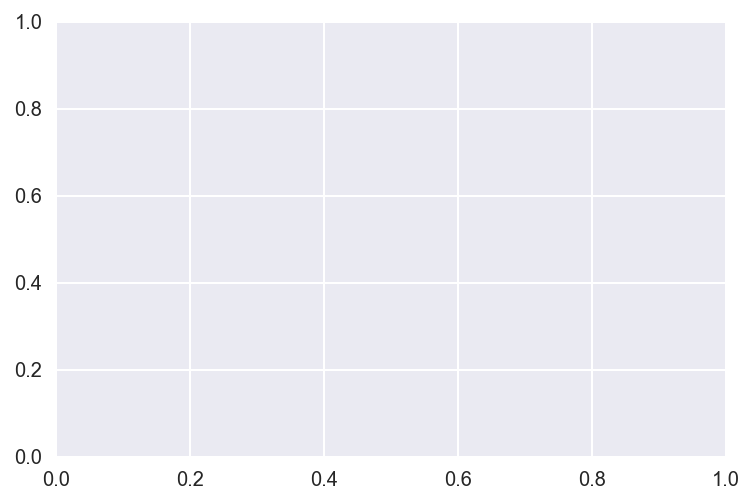

In [114]:

store39 = result[result['store_nbr'] == 39]
df_item = pd.DataFrame(store39, columns=['store_nbr'])
#df_item = pd.DataFrame(preprocessing.normalize(df_item), columns=list_columns)
dfX = sm.add_constant(df_item)
dfy = store39.units

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()

/Users/woongkook/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/woongkook/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


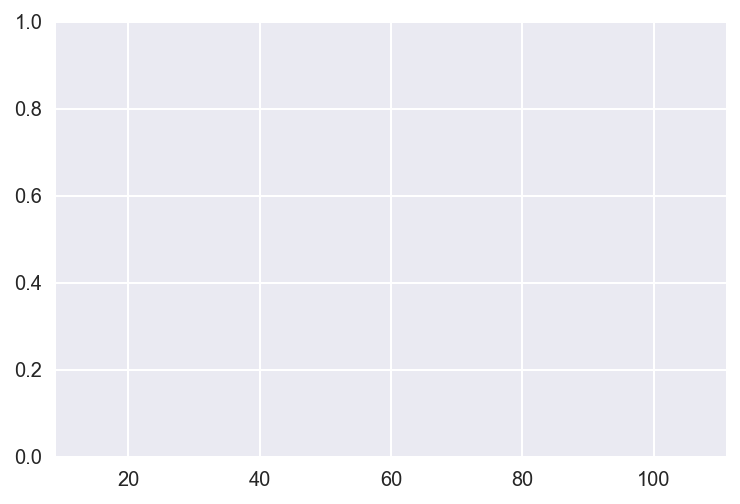

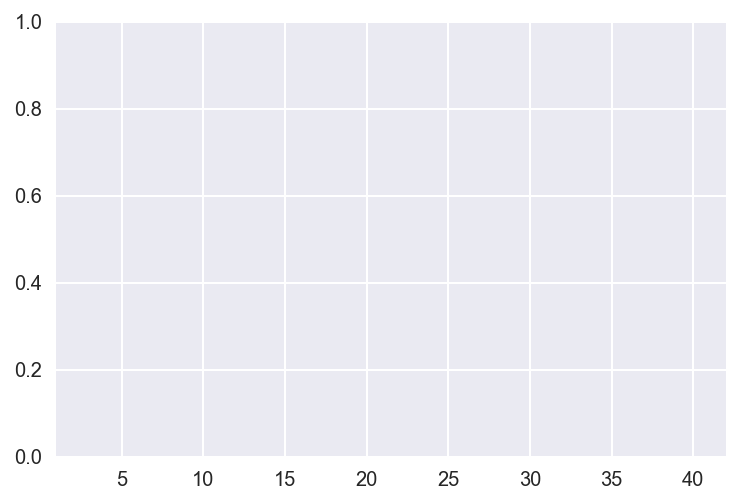

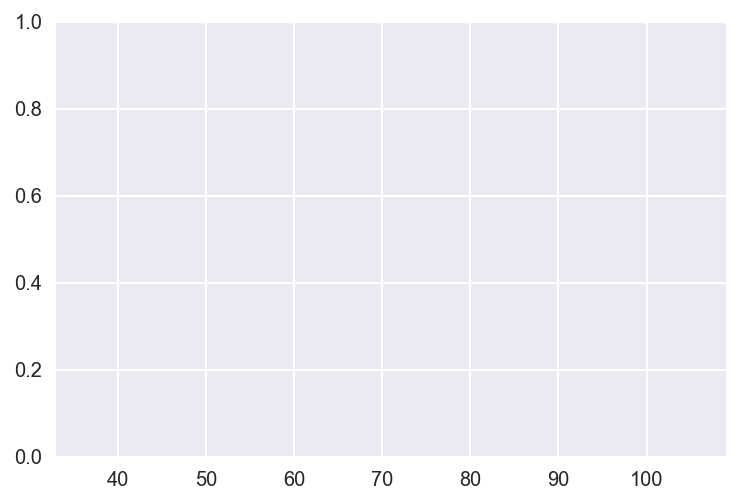

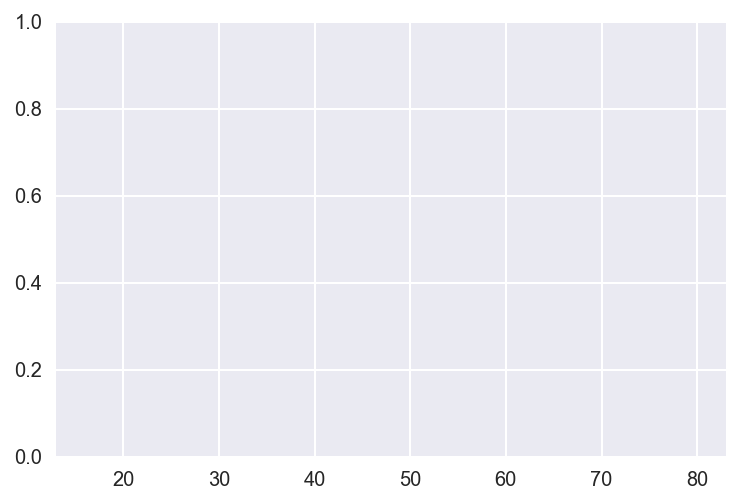

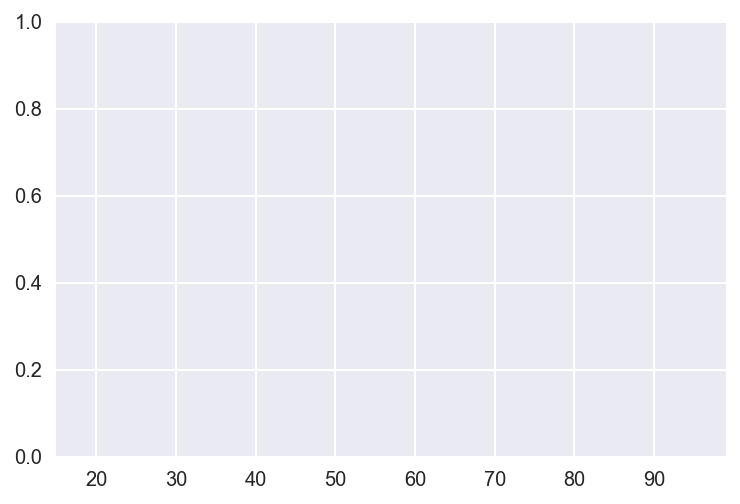

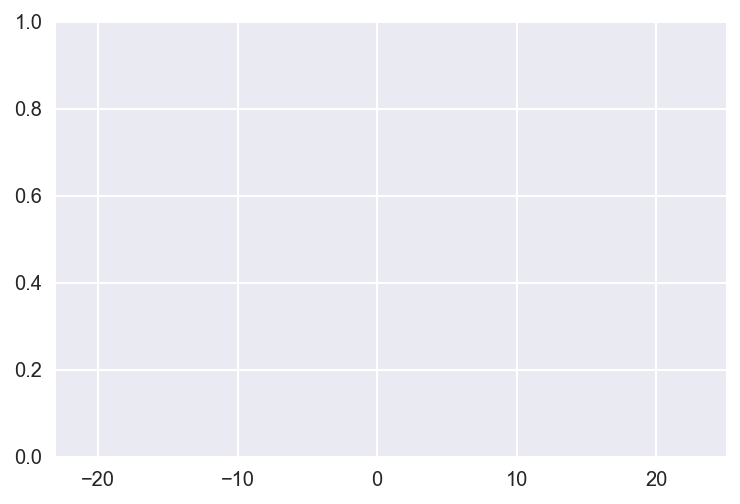

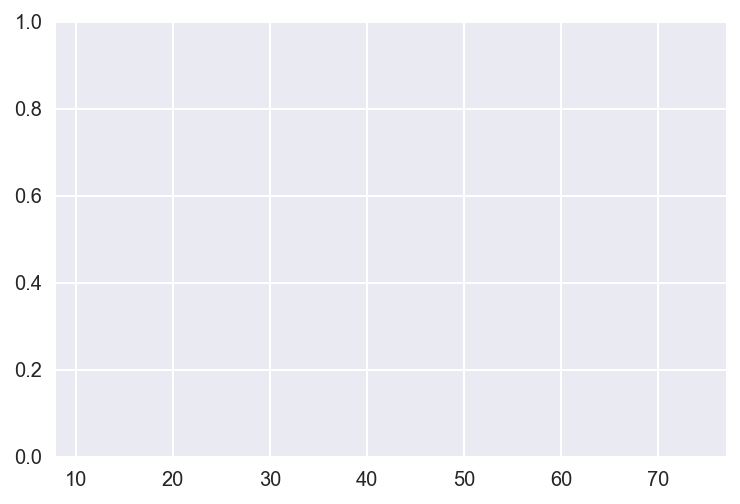

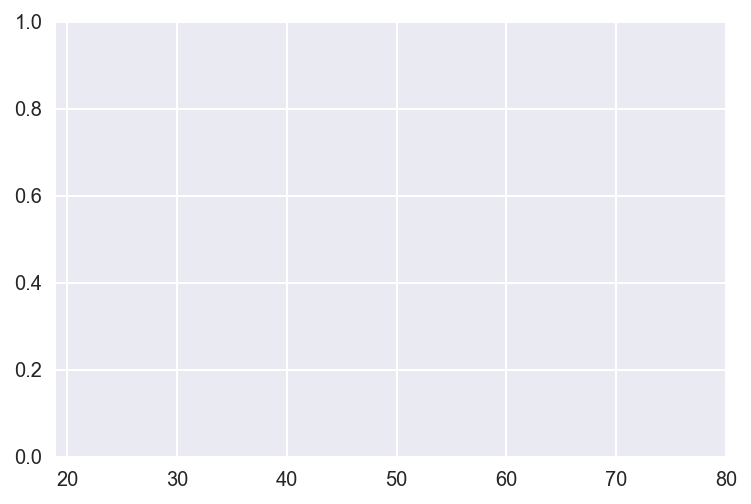

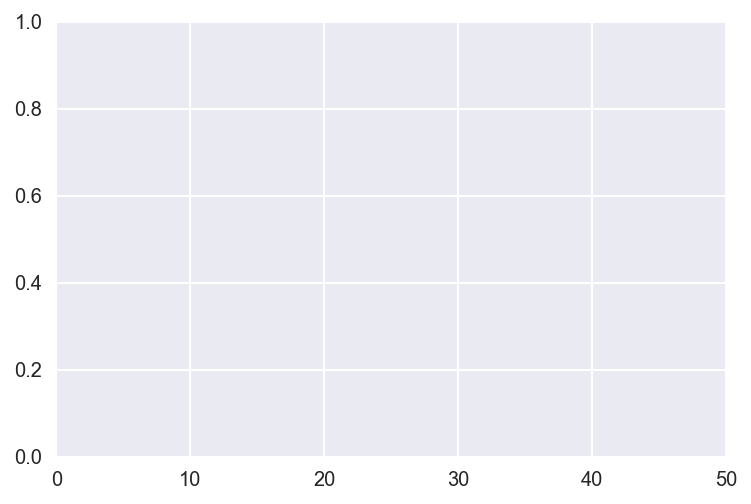

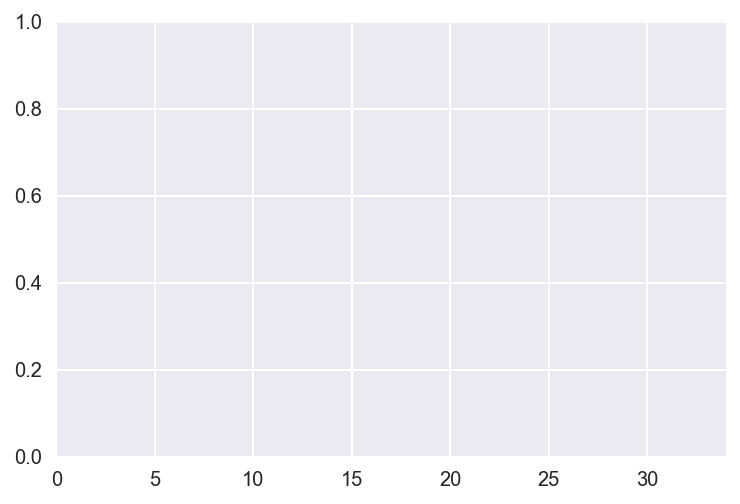

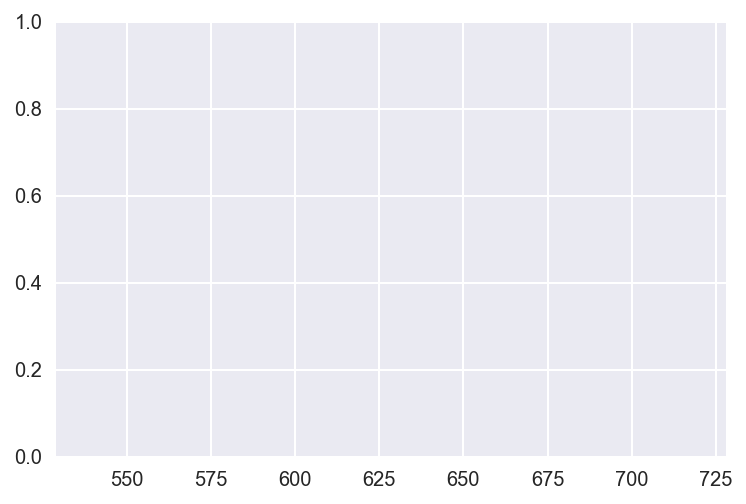

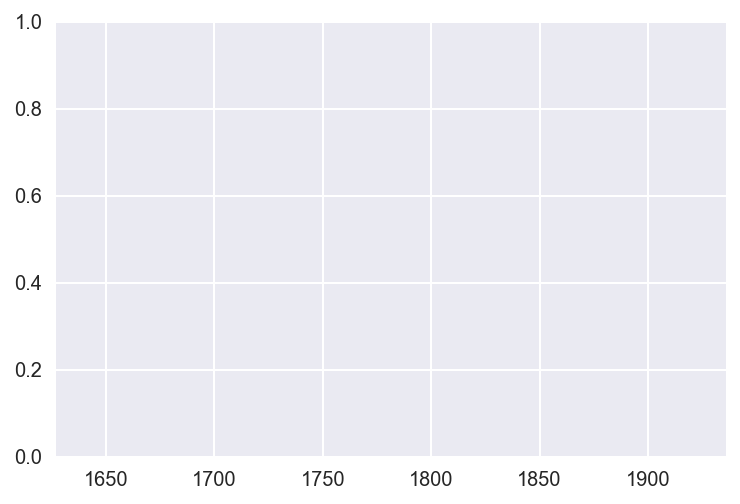

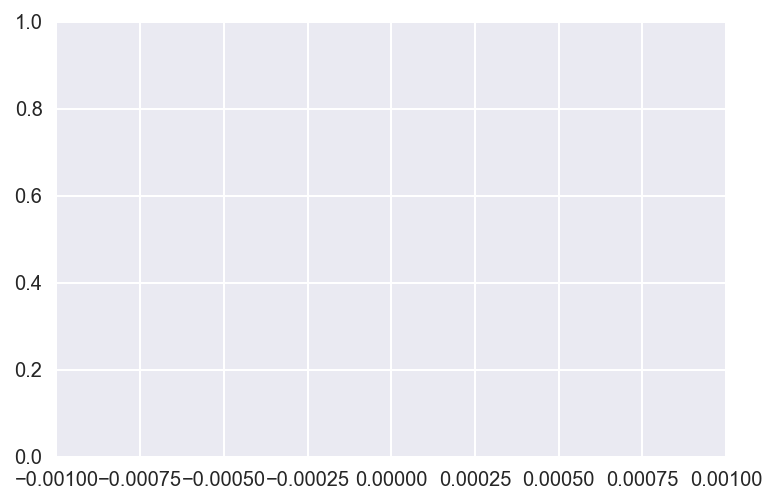

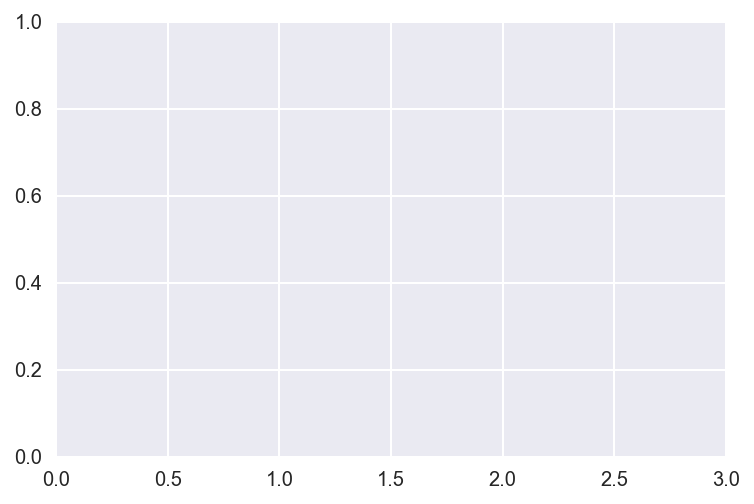

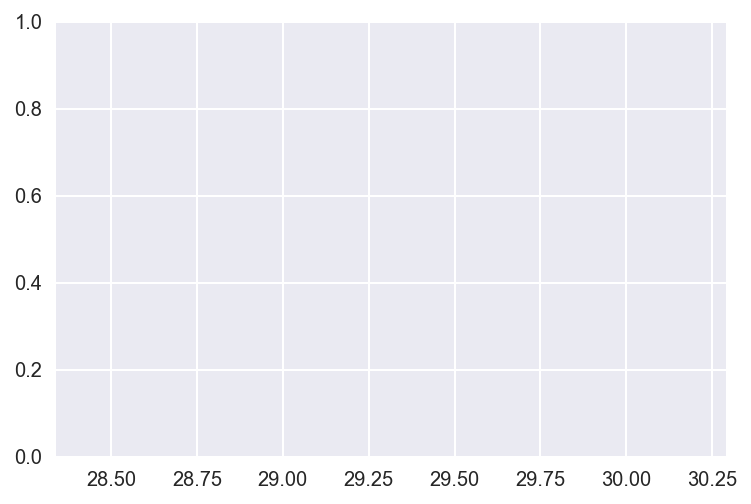

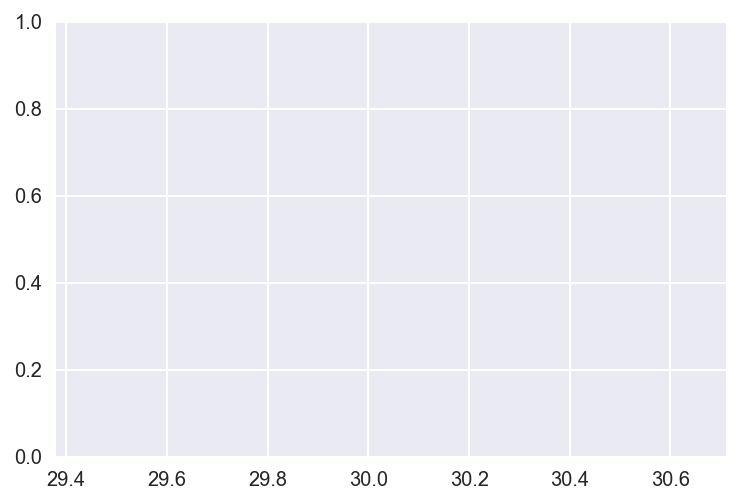

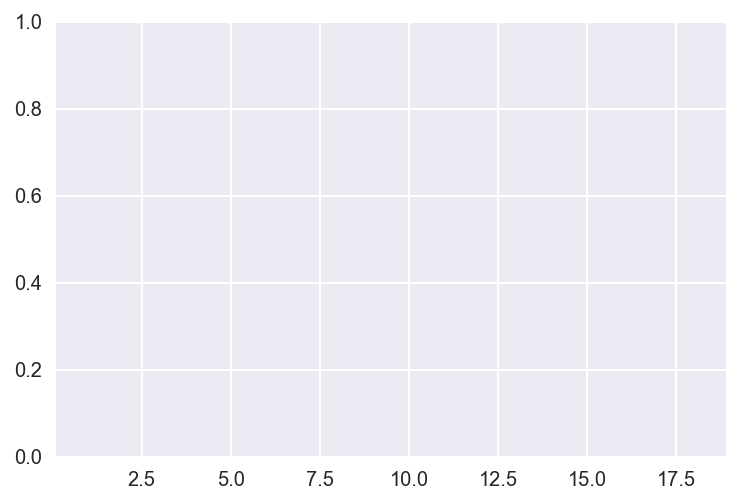

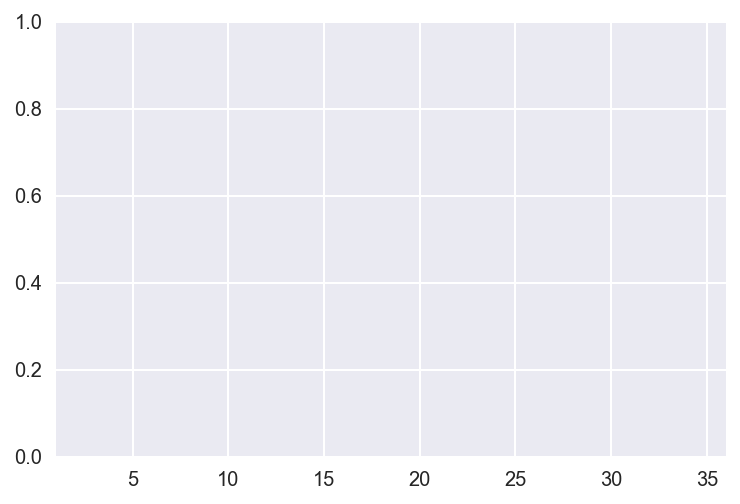

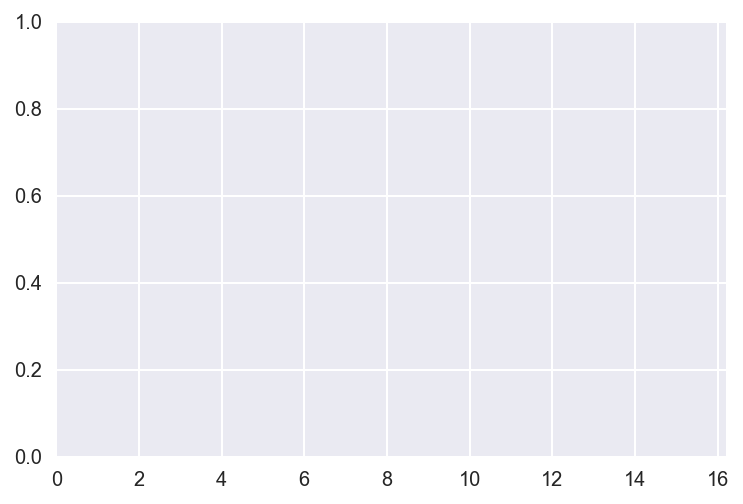

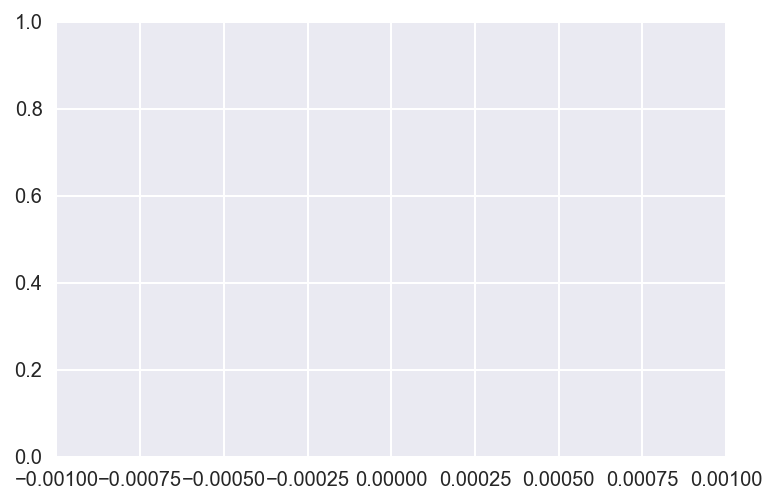

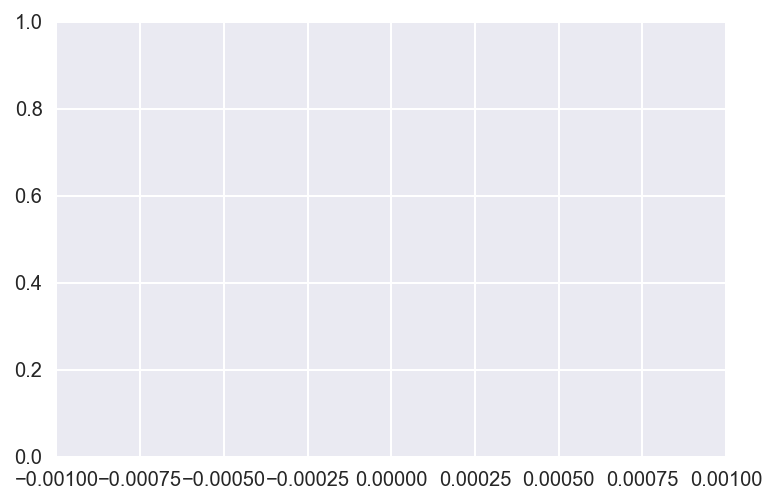

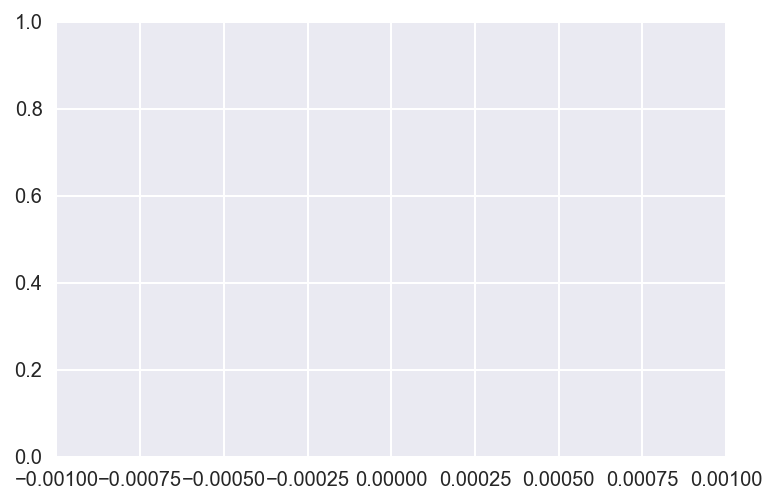

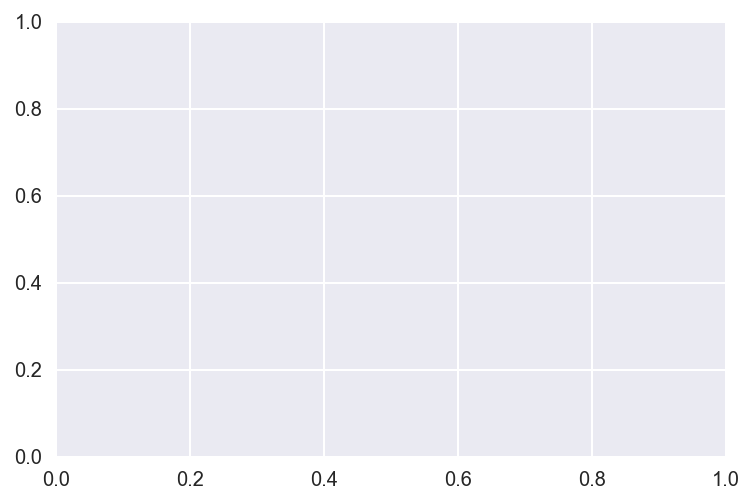

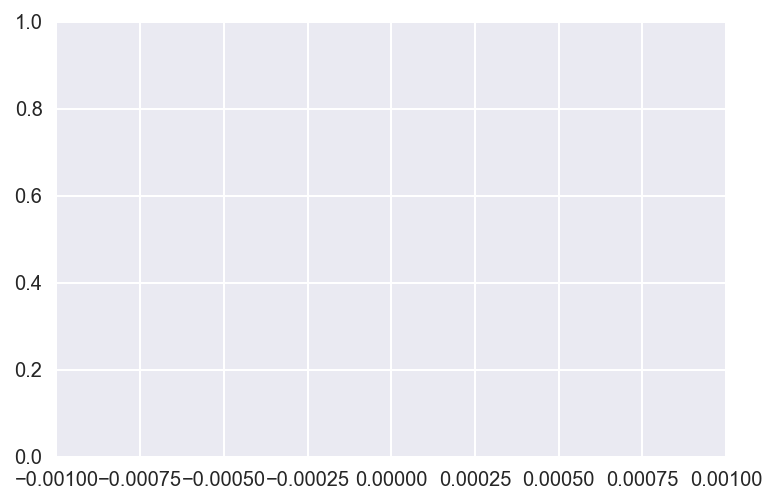

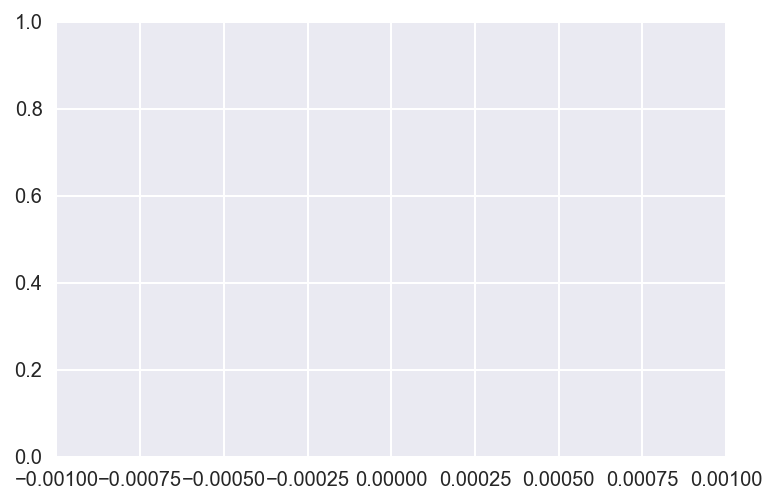

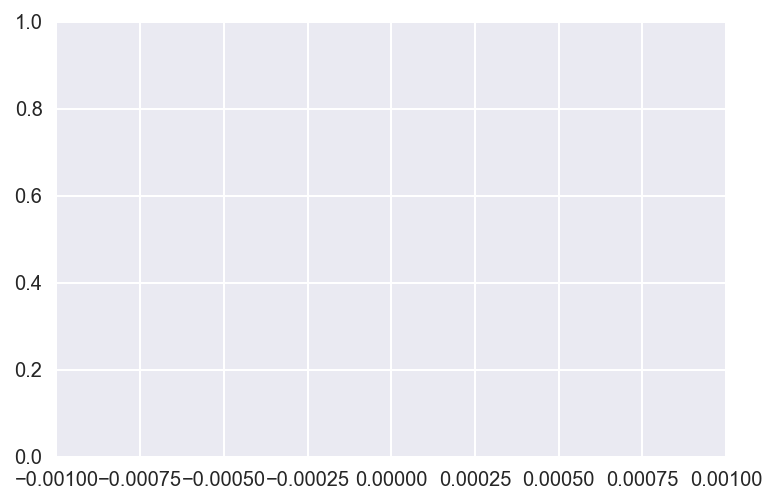

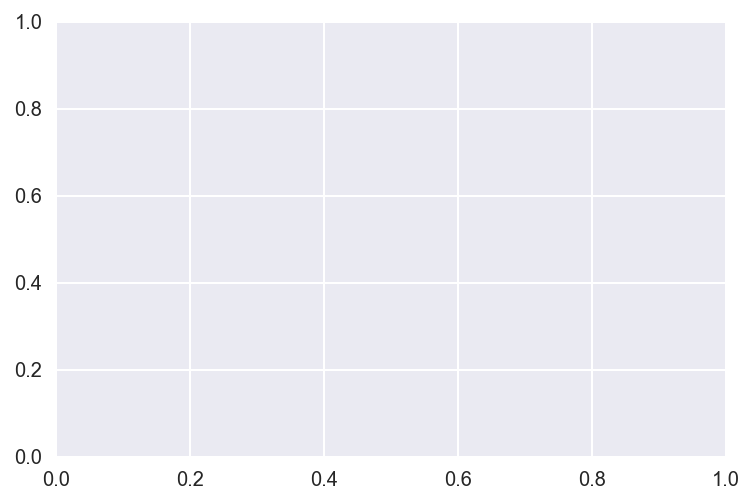

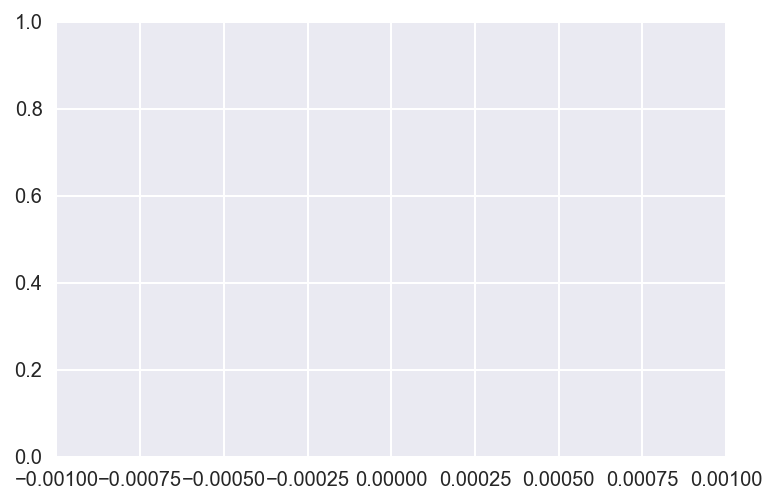

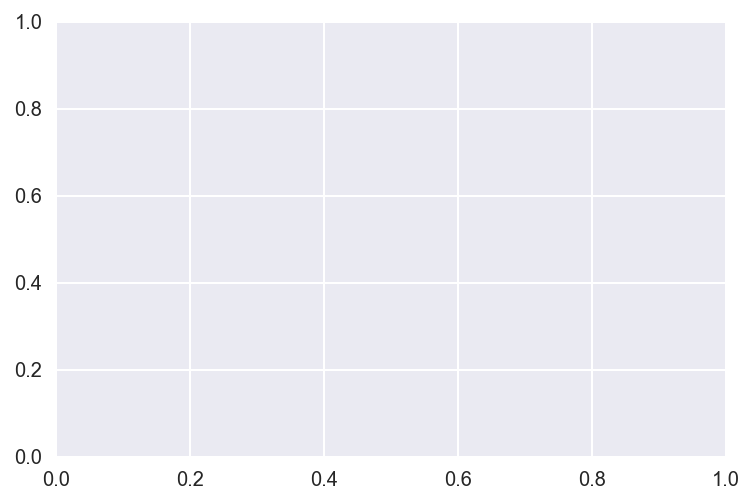

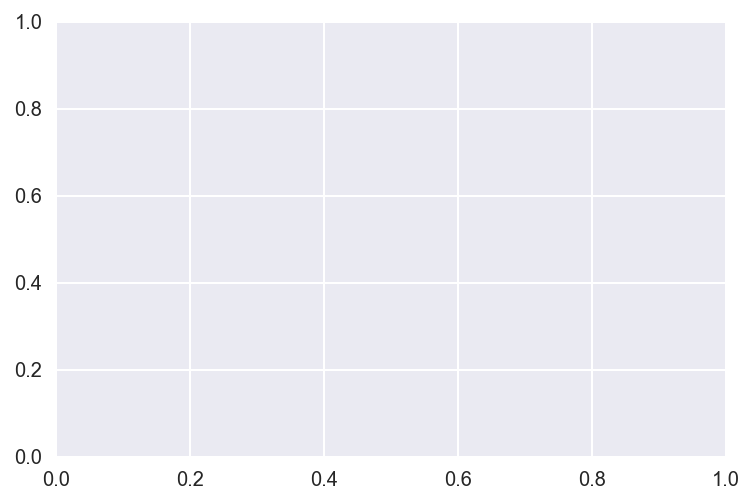

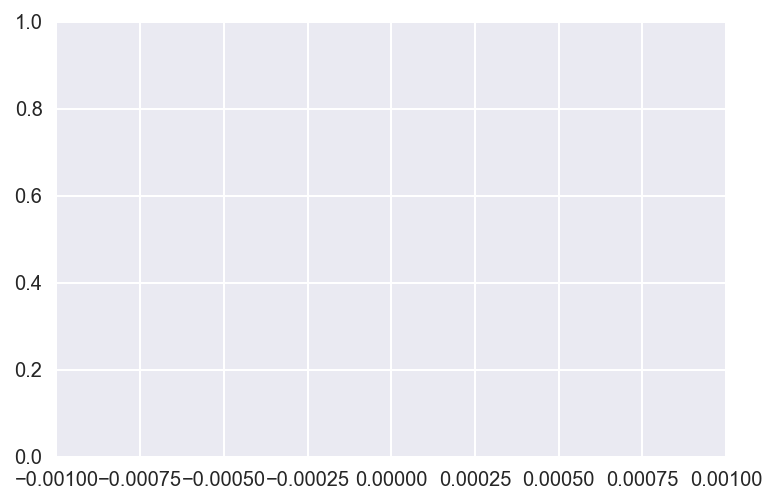

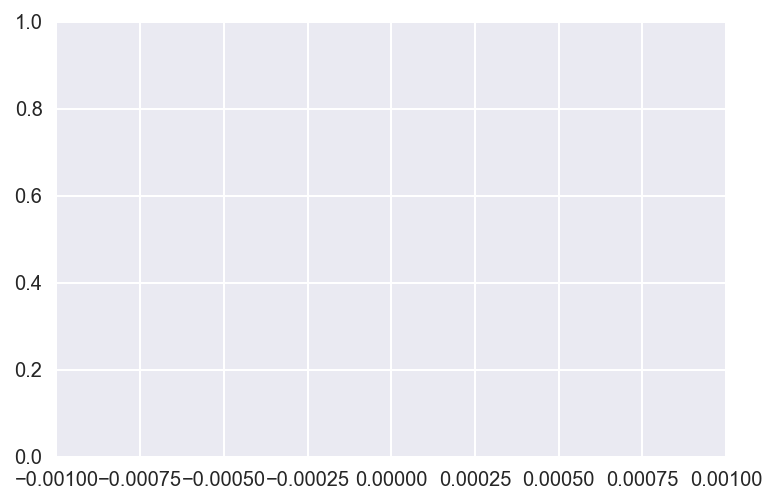

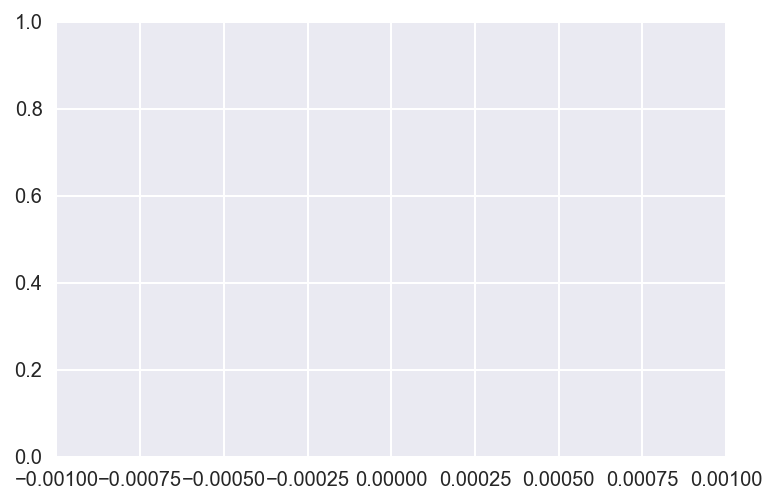

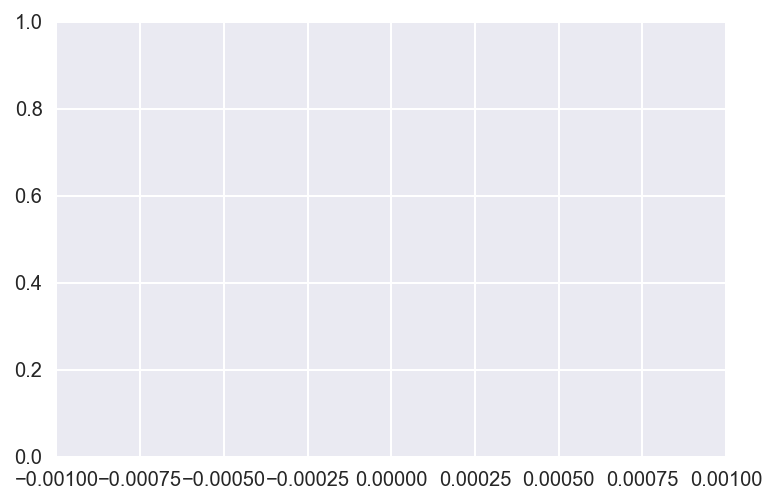

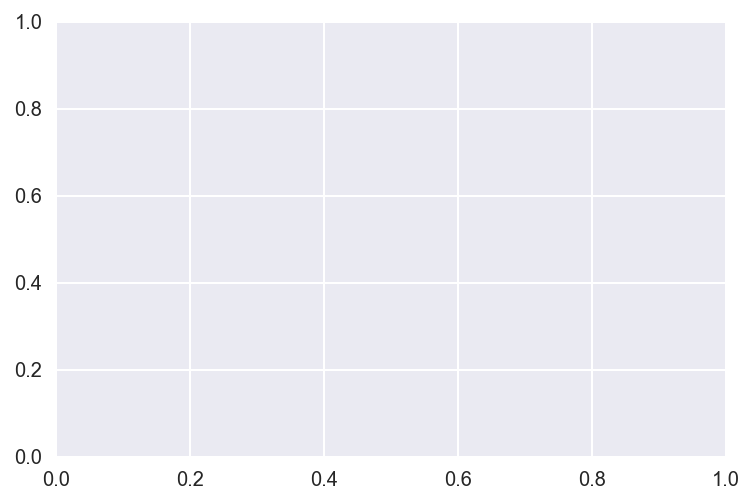

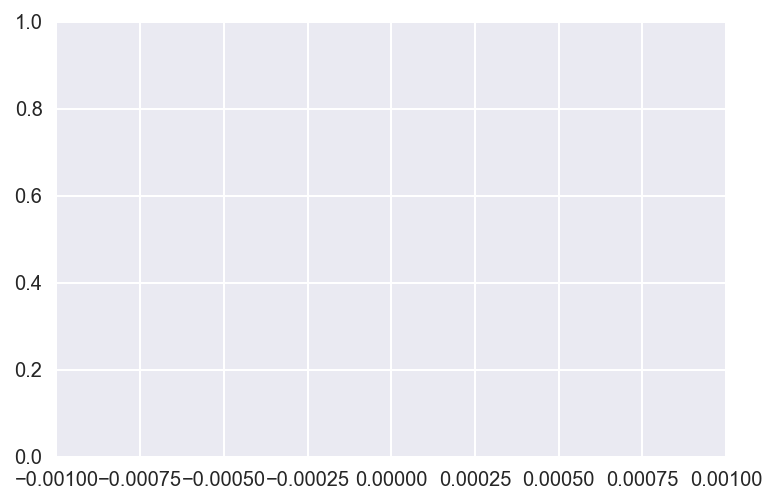

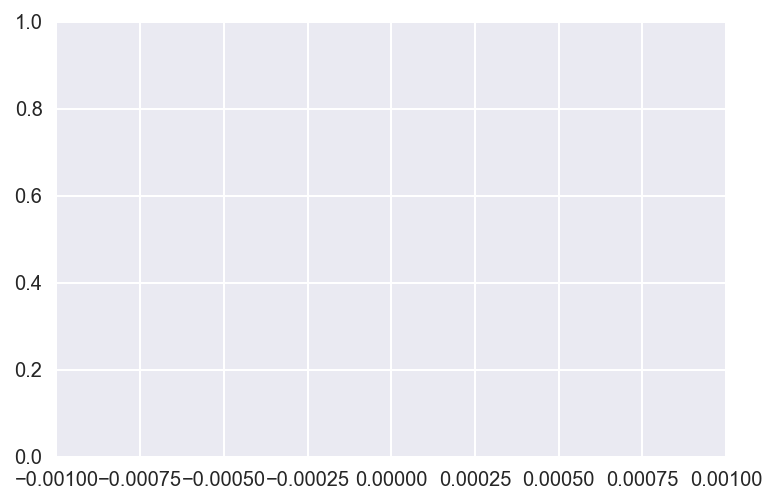

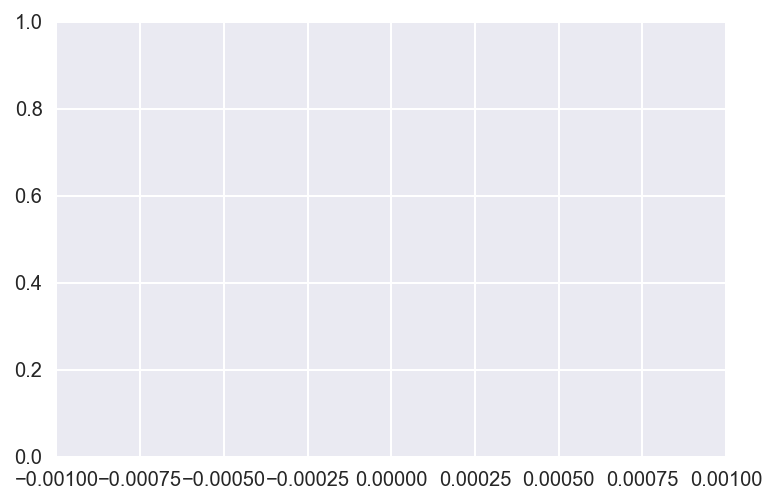

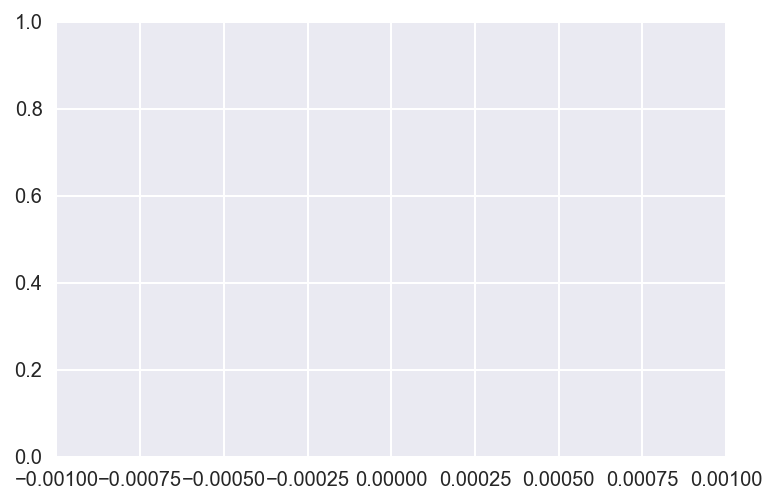

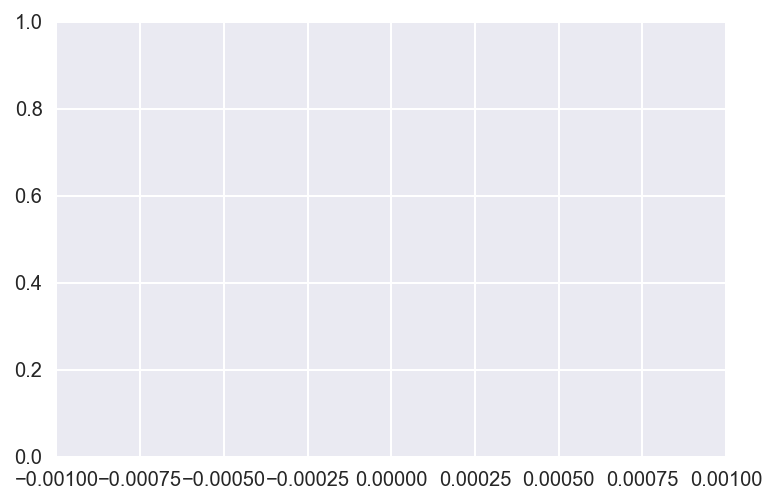

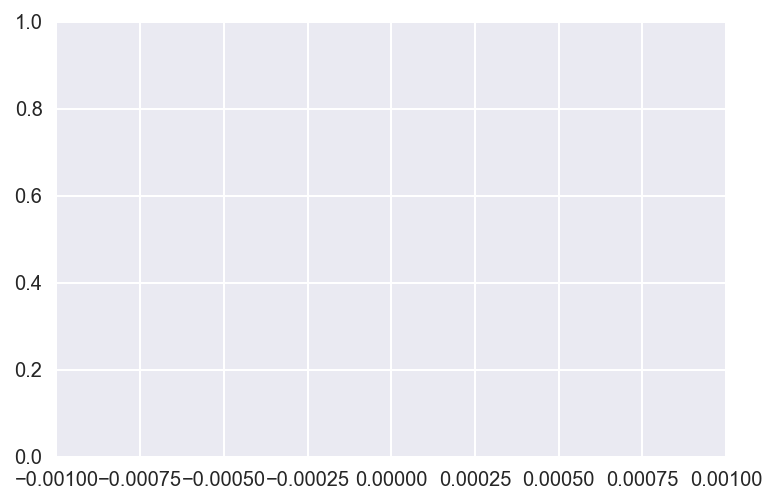

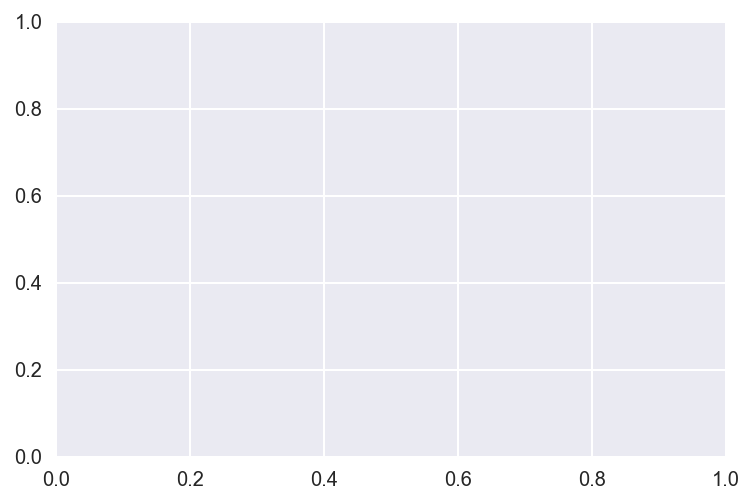

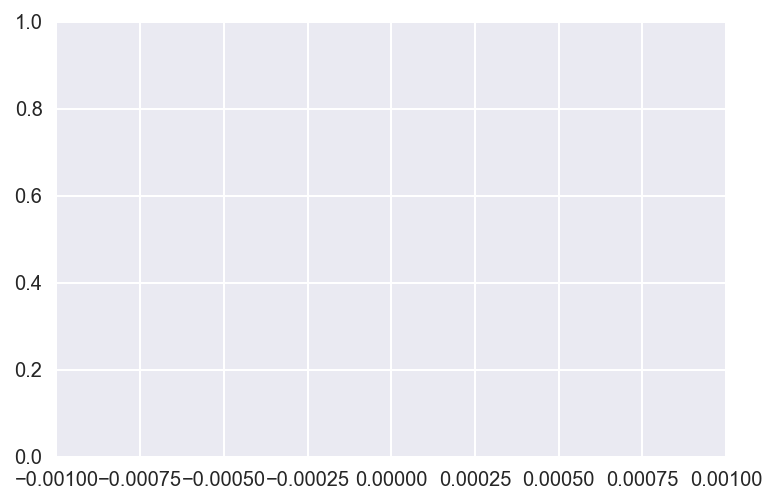

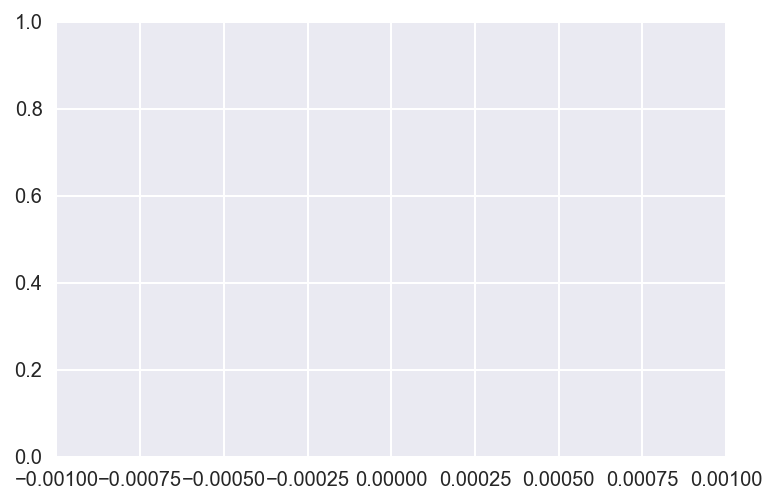

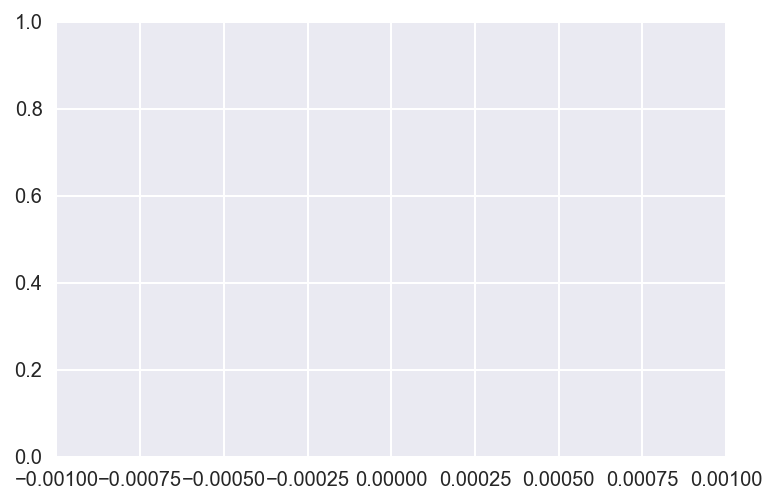

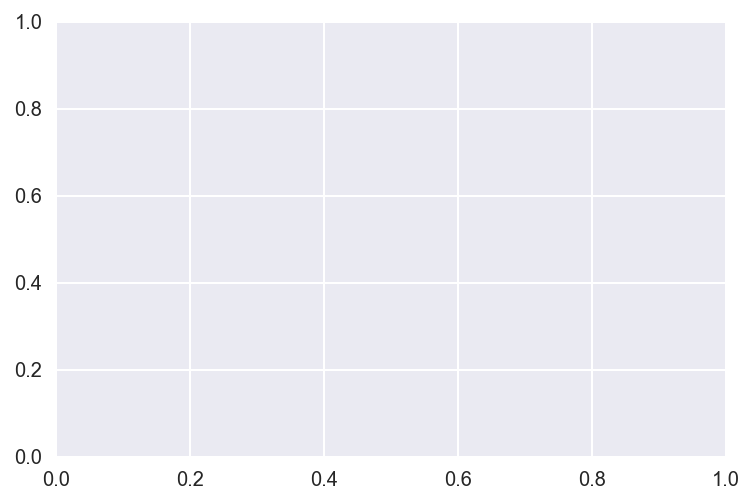

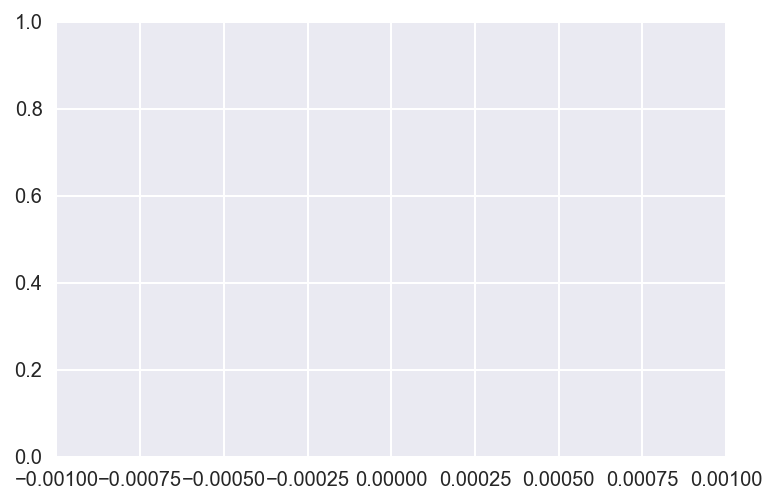

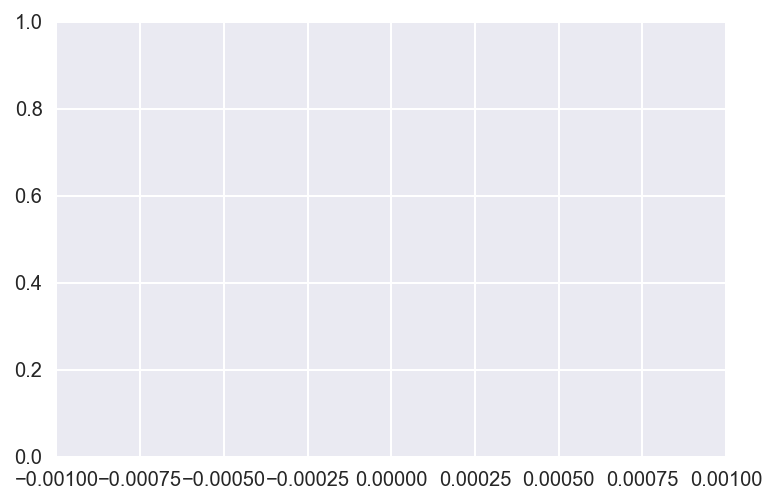

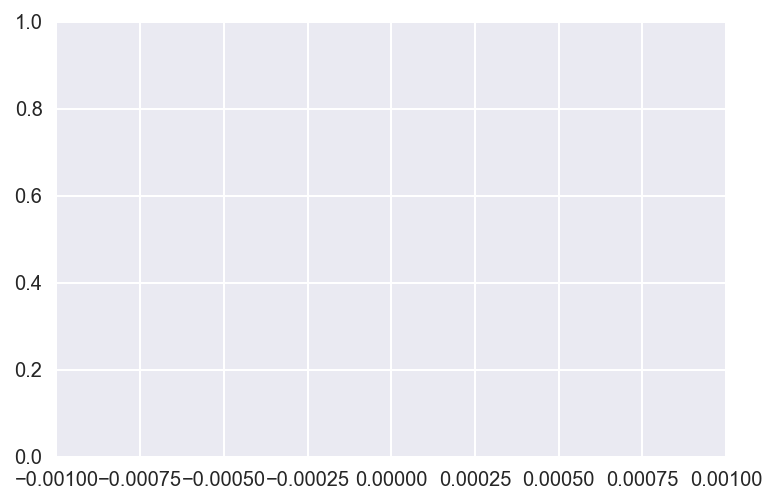

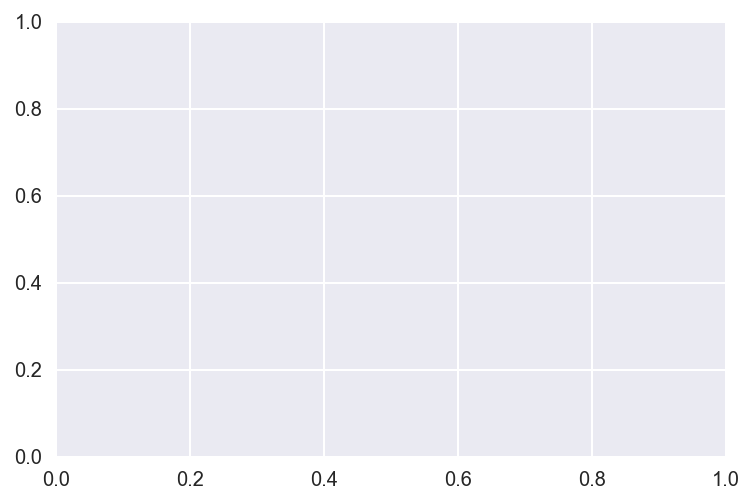

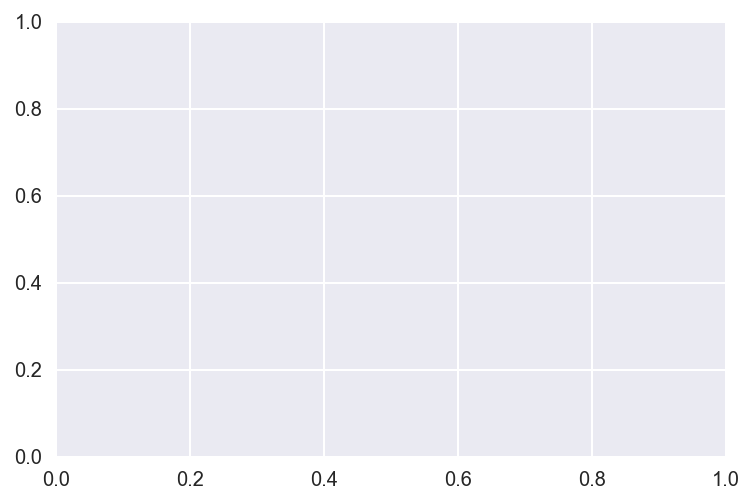

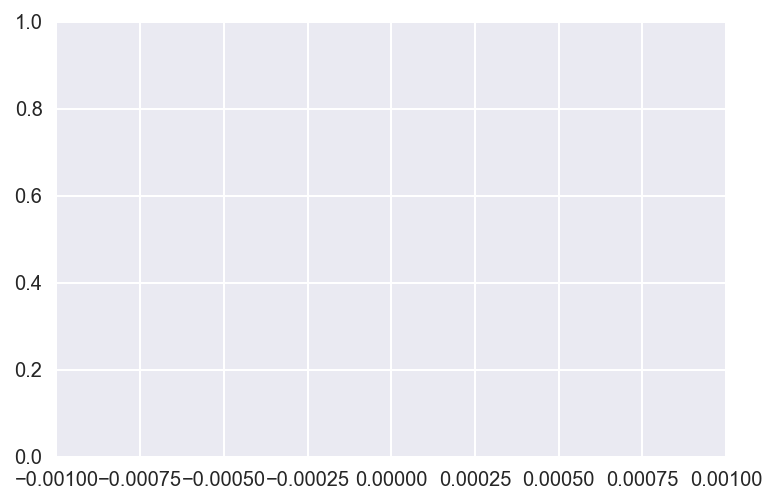

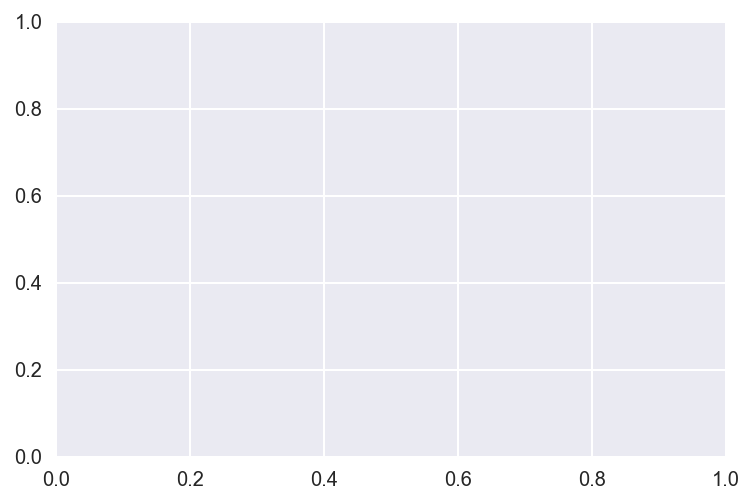

In [111]:

list_columns = ['item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC']
df = pd.DataFrame()
for columns in list_columns:
    store39 = result[result['store_nbr'] == 39]
    df_item = pd.DataFrame(store39, columns=[columns])
    #df_item = pd.DataFrame(preprocessing.normalize(df_item), columns=list_columns)
    dfX = sm.add_constant(df_item)
    dfy = store39.units

    model_boston2 = sm.OLS(dfy, dfX)
    result_boston2 = model_boston2.fit()
    sm.graphics.abline_plot(model_results= result_boston2, c="r", linestyle="--")

In [108]:

list_columns = ['item_nbr', 'units', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', '+FC',
       'BC', 'BL', 'BR', 'DR', 'DS', 'DU', 'DZ', 'FC', 'FG', 'FG+', 'FU', 'FZ',
       'GR', 'GS', 'HZ', 'IC', 'MI', 'PL', 'PO', 'PR', 'PY', 'RA', 'SA', 'SG',
       'SH', 'SN', 'SO', 'SQ', 'SS', 'TS', 'UP', 'VA', 'VC']
df = pd.DataFrame()
for columns in list_columns:
    store39 = result[result['store_nbr'] == 39]
    df_item = pd.DataFrame(store39, columns=[columns])
    #df_item = pd.DataFrame(preprocessing.normalize(df_item), columns=list_columns)
    dfX = sm.add_constant(df_item)
    dfy = store39.units

    model_boston2 = sm.OLS(dfy, dfX)
    result_boston2 = model_boston2.fit()
    result_boston2.summary().values
    
df

AttributeError: 'Summary' object has no attribute 'values'

In [ ]:
results = {'Noconst':results_noconstant.summary2(), 
           'withcon':results_withconstant.summary2()}
df = pd.DataFrame({'Model':[], 'Param':[], 'Value':[]})
for mod in results.keys():
    for col in results[mod].tables[0].columns:
        if col % 2 == 0: 
            df = df.append(pd.DataFrame({'Model': [mod]*results[mod].tables[0][col].size,
                                         'Param':results[mod].tables[0][col].values, 
                                         'Value':results[mod].tables[0][col+1].values}))

print df